## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer=keras.layers.Input([x_train.shape[-1]])
    x=keras.layers.Dense(units=512,activation='relu')(input_layer)
    x=keras.layers.Dense(units=256,activation='relu')(x)
    x=keras.layers.Dense(units=128,activation='relu')(x)
    out=keras.layers.Dense(units=10,activation='softmax')(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
optimizer=keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 44s 874us/step - loss: 2.2756 - acc: 0.1472 - val_loss: 2.2293 - val_acc: 0.1859
Epoch 2/500
50000/50000 [==============================] - 31s 621us/step - loss: 2.2005 - acc: 0.2048 - val_loss: 2.1680 - val_acc: 0.2215
Epoch 3/500
50000/50000 [==============================] - 31s 623us/step - loss: 2.1451 - acc: 0.2386 - val_loss: 2.1171 - val_acc: 0.2642
Epoch 4/500
50000/50000 [==============================] - 35s 697us/step - loss: 2.0979 - acc: 0.2665 - val_loss: 2.0731 - val_acc: 0.2911
Epoch 5/500
50000/50000 [==============================] - 31s 624us/step - loss: 1.9923 - acc: 0.3121 - val_loss: 1.9757 - val_acc: 0.3275
Epoch 8/500
50000/50000 [==============================] - 31s 621us/step - loss: 1.9667 - acc: 0.3198 - val_loss: 1.9518 - val_acc: 0.3317
Epoch 9/500
50000/50000 [==============================] - 34s

50000/50000 [==============================] - 34s 683us/step - loss: 1.6546 - acc: 0.4212 - val_loss: 1.6594 - val_acc: 0.4188
Epoch 59/500
50000/50000 [==============================] - 36s 712us/step - loss: 1.6515 - acc: 0.4225 - val_loss: 1.6595 - val_acc: 0.4211
Epoch 60/500
50000/50000 [==============================] - 35s 699us/step - loss: 1.6487 - acc: 0.4237 - val_loss: 1.6542 - val_acc: 0.4205
Epoch 61/500
50000/50000 [==============================] - 40s 809us/step - loss: 1.6457 - acc: 0.4249 - val_loss: 1.6506 - val_acc: 0.4213
Epoch 62/500
50000/50000 [==============================] - 39s 785us/step - loss: 1.6427 - acc: 0.4254 - val_loss: 1.6478 - val_acc: 0.4257
Epoch 63/500
50000/50000 [==============================] - 34s 674us/step - loss: 1.6398 - acc: 0.4272 - val_loss: 1.6457 - val_acc: 0.4253
Epoch 64/500
50000/50000 [==============================] - 34s 686us/step - loss: 1.6368 - acc: 0.4279 - val_loss: 1.6419 - val_acc: 0.4255
Epoch 65/500
50000/50000 [

50000/50000 [==============================] - 44s 882us/step - loss: 1.5153 - acc: 0.4703 - val_loss: 1.5381 - val_acc: 0.4554
Epoch 118/500
50000/50000 [==============================] - 41s 827us/step - loss: 1.5130 - acc: 0.4710 - val_loss: 1.5366 - val_acc: 0.4583
Epoch 119/500
50000/50000 [==============================] - 67s 1ms/step - loss: 1.5119 - acc: 0.4711 - val_loss: 1.5343 - val_acc: 0.4587
Epoch 120/500
50000/50000 [==============================] - 63s 1ms/step - loss: 1.5098 - acc: 0.4724 - val_loss: 1.5332 - val_acc: 0.4625
Epoch 121/500
50000/50000 [==============================] - 63s 1ms/step - loss: 1.5078 - acc: 0.4732 - val_loss: 1.5370 - val_acc: 0.4584
Epoch 122/500
50000/50000 [==============================] - 64s 1ms/step - loss: 1.5063 - acc: 0.4732 - val_loss: 1.5299 - val_acc: 0.4595
Epoch 123/500
50000/50000 [==============================] - 65s 1ms/step - loss: 1.5040 - acc: 0.4757 - val_loss: 1.5327 - val_acc: 0.4588
Epoch 124/500
50000/50000 [===

50000/50000 [==============================] - 63s 1ms/step - loss: 1.4175 - acc: 0.5043 - val_loss: 1.4703 - val_acc: 0.4841
Epoch 179/500
50000/50000 [==============================] - 60s 1ms/step - loss: 1.4164 - acc: 0.5056 - val_loss: 1.4694 - val_acc: 0.4818
Epoch 180/500
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4147 - acc: 0.5060 - val_loss: 1.4620 - val_acc: 0.4856
Epoch 181/500
50000/50000 [==============================] - 59s 1ms/step - loss: 1.4133 - acc: 0.5075 - val_loss: 1.4638 - val_acc: 0.4814
Epoch 182/500
50000/50000 [==============================] - 63s 1ms/step - loss: 1.4117 - acc: 0.5070 - val_loss: 1.4633 - val_acc: 0.4826
Epoch 183/500
50000/50000 [==============================] - 64s 1ms/step - loss: 1.4102 - acc: 0.5080 - val_loss: 1.4618 - val_acc: 0.4852
Epoch 184/500
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4094 - acc: 0.5073 - val_loss: 1.4596 - val_acc: 0.4870
Epoch 185/500
50000/50000 [=======

50000/50000 [==============================] - 38s 754us/step - loss: 1.3418 - acc: 0.5322 - val_loss: 1.4208 - val_acc: 0.4977
Epoch 236/500
50000/50000 [==============================] - 31s 624us/step - loss: 1.3401 - acc: 0.5333 - val_loss: 1.4143 - val_acc: 0.4982
Epoch 237/500
50000/50000 [==============================] - 32s 635us/step - loss: 1.3394 - acc: 0.5326 - val_loss: 1.4138 - val_acc: 0.4999
Epoch 238/500
50000/50000 [==============================] - 31s 622us/step - loss: 1.3378 - acc: 0.5338 - val_loss: 1.4320 - val_acc: 0.4921
Epoch 239/500
50000/50000 [==============================] - 31s 619us/step - loss: 1.3363 - acc: 0.5330 - val_loss: 1.4150 - val_acc: 0.4946
Epoch 240/500
50000/50000 [==============================] - 31s 620us/step - loss: 1.3353 - acc: 0.5345 - val_loss: 1.4113 - val_acc: 0.4990
Epoch 241/500
50000/50000 [==============================] - 31s 626us/step - loss: 1.3337 - acc: 0.5350 - val_loss: 1.4145 - val_acc: 0.4964
Epoch 242/500
50000/

50000/50000 [==============================] - 38s 759us/step - loss: 1.2742 - acc: 0.5542 - val_loss: 1.3808 - val_acc: 0.5051
Epoch 292/500
50000/50000 [==============================] - 33s 669us/step - loss: 1.2730 - acc: 0.5542 - val_loss: 1.4021 - val_acc: 0.5082
Epoch 293/500
50000/50000 [==============================] - 31s 623us/step - loss: 1.2719 - acc: 0.5558 - val_loss: 1.3940 - val_acc: 0.5008
Epoch 294/500
50000/50000 [==============================] - 31s 615us/step - loss: 1.2713 - acc: 0.5565 - val_loss: 1.3795 - val_acc: 0.5107
Epoch 295/500
50000/50000 [==============================] - 31s 626us/step - loss: 1.2690 - acc: 0.5557 - val_loss: 1.3832 - val_acc: 0.5023
Epoch 296/500
50000/50000 [==============================] - 31s 622us/step - loss: 1.2687 - acc: 0.5567 - val_loss: 1.3955 - val_acc: 0.4991
Epoch 297/500
50000/50000 [==============================] - 31s 620us/step - loss: 1.2671 - acc: 0.5582 - val_loss: 1.3797 - val_acc: 0.5080
Epoch 298/500
50000/

50000/50000 [==============================] - 46s 911us/step - loss: 1.2072 - acc: 0.5777 - val_loss: 1.3682 - val_acc: 0.5103
Epoch 352/500
50000/50000 [==============================] - 55s 1ms/step - loss: 1.2064 - acc: 0.5778 - val_loss: 1.3781 - val_acc: 0.5111
Epoch 353/500
50000/50000 [==============================] - 54s 1ms/step - loss: 1.2052 - acc: 0.5785 - val_loss: 1.3636 - val_acc: 0.5168
Epoch 354/500
50000/50000 [==============================] - 42s 833us/step - loss: 1.2051 - acc: 0.5766 - val_loss: 1.3730 - val_acc: 0.5142
Epoch 355/500
50000/50000 [==============================] - 35s 702us/step - loss: 1.2008 - acc: 0.5777 - val_loss: 1.3845 - val_acc: 0.5091
Epoch 358/500
50000/50000 [==============================] - 34s 690us/step - loss: 1.1984 - acc: 0.5814 - val_loss: 1.3544 - val_acc: 0.5196
Epoch 359/500
50000/50000 [==============================] - 33s 659us/step - loss: 1.1980 - acc: 0.5813 - val_loss: 1.3638 - val_acc: 0.5131
Epoch 360/500
50000/5000

50000/50000 [==============================] - 34s 679us/step - loss: 1.1435 - acc: 0.5985 - val_loss: 1.3376 - val_acc: 0.5267
Epoch 411/500
50000/50000 [==============================] - 31s 628us/step - loss: 1.1437 - acc: 0.5990 - val_loss: 1.3476 - val_acc: 0.5198
Epoch 412/500
50000/50000 [==============================] - 31s 627us/step - loss: 1.1434 - acc: 0.5997 - val_loss: 1.3401 - val_acc: 0.5261
Epoch 413/500
50000/50000 [==============================] - 31s 623us/step - loss: 1.1418 - acc: 0.6006 - val_loss: 1.3803 - val_acc: 0.5167
Epoch 414/500
50000/50000 [==============================] - 36s 713us/step - loss: 1.1394 - acc: 0.6019 - val_loss: 1.3409 - val_acc: 0.5253
Epoch 415/500
50000/50000 [==============================] - 35s 707us/step - loss: 1.1387 - acc: 0.6009 - val_loss: 1.3344 - val_acc: 0.5267
Epoch 416/500
50000/50000 [==============================] - 34s 671us/step - loss: 1.1383 - acc: 0.6008 - val_loss: 1.3505 - val_acc: 0.5254
Epoch 417/500
50000/

50000/50000 [==============================] - 33s 651us/step - loss: 1.0824 - acc: 0.6210 - val_loss: 1.3332 - val_acc: 0.5355
Epoch 472/500
50000/50000 [==============================] - 33s 666us/step - loss: 1.0824 - acc: 0.6206 - val_loss: 1.3283 - val_acc: 0.5307
Epoch 473/500
50000/50000 [==============================] - 33s 656us/step - loss: 1.0799 - acc: 0.6218 - val_loss: 1.3371 - val_acc: 0.5323
Epoch 474/500
50000/50000 [==============================] - 33s 659us/step - loss: 1.0783 - acc: 0.6219 - val_loss: 1.3242 - val_acc: 0.5308
Epoch 475/500
50000/50000 [==============================] - 43s 858us/step - loss: 1.0786 - acc: 0.6224 - val_loss: 1.4079 - val_acc: 0.5114
Epoch 476/500
50000/50000 [==============================] - 40s 790us/step - loss: 1.0794 - acc: 0.6222 - val_loss: 1.3339 - val_acc: 0.5311
Epoch 477/500
50000/50000 [==============================] - 34s 671us/step - loss: 1.0762 - acc: 0.6221 - val_loss: 1.3618 - val_acc: 0.5186
Epoch 478/500
50000/

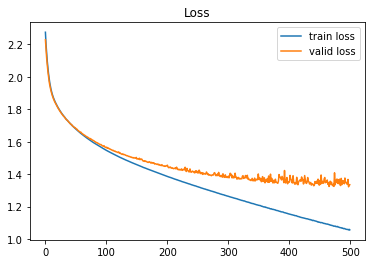

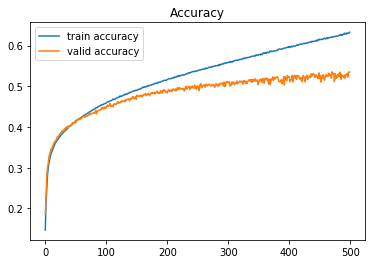

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()